In [12]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [13]:
telescope_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',
                           names = ['fLength', 'fWidth','fSize','fConc','fConcl','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'],
                           header=None)
df1=telescope_data.drop(['class'],axis=1)
df1.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [14]:
len(df1)

19020

In [15]:
# 中心化
df=df1.apply(lambda x:(x-np.mean(x)))
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-24.453454,-6.178866,-0.180117,0.011473,-0.016457,32.032145,11.465455,-8.452426,12.446293,-111.935226
1,-21.646554,-10.457466,-0.306517,0.149973,0.162643,30.603945,13.278255,-10.207126,-21.284807,11.442974
2,108.801846,113.850034,1.236183,-0.342927,-0.195957,121.072745,-75.403545,-45.465726,49.314293,62.969974
3,-29.432954,-12.608166,-0.486517,0.234373,0.177543,31.542445,-17.008845,-7.401026,-17.196707,-77.081026
4,21.886046,8.739534,0.336083,-0.063527,-0.031457,-1.195955,18.006955,21.589574,-22.997707,162.643974


In [16]:
print('相关系数')
print(df.corr())
print('协方差')
print(df.cov())

相关系数
           fLength    fWidth     fSize     fConc    fConcl     fAsym  \
fLength   1.000000  0.770512  0.702454 -0.630999 -0.598145 -0.368556   
fWidth    0.770512  1.000000  0.717517 -0.609779 -0.581141 -0.266961   
fSize     0.702454  0.717517  1.000000 -0.850850 -0.808835 -0.159863   
fConc    -0.630999 -0.609779 -0.850850  1.000000  0.976412  0.112272   
fConcl   -0.598145 -0.581141 -0.808835  0.976412  1.000000  0.100159   
fAsym    -0.368556 -0.266961 -0.159863  0.112272  0.100159  1.000000   
fM3Long  -0.119747 -0.176234  0.095157 -0.121899 -0.118769  0.274045   
fM3Trans  0.013389  0.039744  0.015455 -0.011294 -0.010966  0.002553   
fAlpha   -0.008777  0.066061 -0.186675  0.235272  0.229799 -0.055689   
fDist     0.418466  0.336816  0.437041 -0.328332 -0.304625 -0.206730   

           fM3Long  fM3Trans    fAlpha     fDist  
fLength  -0.119747  0.013389 -0.008777  0.418466  
fWidth   -0.176234  0.039744  0.066061  0.336816  
fSize     0.095157  0.015455 -0.186675  0.437041 

In [17]:
mean_vec=[]
a=np.array(df1.transpose())
for i in range(10):
    mean_vec.append(a[i].mean())
print('mean_vec:','\n',mean_vec)

mean_vec: 
 [53.25015392744479, 22.180966219768667, 2.825016961093586, 0.3803270715036804, 0.21465713459516297, -4.331745157728706, 10.545544815983174, 0.2497259568874868, 27.645706677181913, 193.81802646687697]


In [18]:
# Compute the sample covariance matrix as inner products
np.set_printoptions(suppress=True)
centered_data=np.array(df.transpose())
cov1=np.dot(centered_data,df)/(len(df)-1)
print('cov1','\n',cov1)

cov1 
 [[1794.78093432  598.86354217   14.06422933   -4.88699477   -2.8003803
  -924.43410297 -258.72715464   11.81400775   -9.70681761 1324.86413087]
 [ 598.86354217  336.5777816     6.22110176   -2.04513685   -1.17822641
  -289.97234587 -164.89373393   15.18608687   31.63669384  461.78620039]
 [  14.06422933    6.22110176    0.22334948   -0.07351108   -0.04224323
    -4.47307815    2.29353454    0.15212134   -2.30292484   15.43546731]
 [  -4.88699477   -2.04513685   -0.07351108    0.03342065    0.01972628
     1.21519489   -1.13652751   -0.0430025     1.12273751   -4.48566053]
 [  -2.8003803    -1.17822641   -0.04224323    0.01972628    0.01221264
     0.65533268   -0.66938915   -0.02523905    0.66290718   -2.51579453]
 [-924.43410297 -289.97234587   -4.47307815    1.21519489    0.65533268
  3505.35777574  827.48274684    3.14793086  -86.06634976 -914.69072157]
 [-258.72715464 -164.89373393    2.29353454   -1.13652751   -0.66938915
   827.48274684 2601.01203743  -18.26636059 -247.985

In [19]:
# Compute the sample covariance matrix as outer product
cov2=np.zeros((10,10))
for i in range(10):
    for j in range(10):
        cov2[i][j]=(np.sum(centered_data[i]*centered_data[j]))/(len(df)-1)
print('cov2','\n',cov2)

cov2 
 [[1794.78093432  598.86354217   14.06422933   -4.88699477   -2.8003803
  -924.43410297 -258.72715464   11.81400775   -9.70681761 1324.86413087]
 [ 598.86354217  336.5777816     6.22110176   -2.04513685   -1.17822641
  -289.97234587 -164.89373393   15.18608687   31.63669384  461.78620039]
 [  14.06422933    6.22110176    0.22334948   -0.07351108   -0.04224323
    -4.47307815    2.29353454    0.15212134   -2.30292484   15.43546731]
 [  -4.88699477   -2.04513685   -0.07351108    0.03342065    0.01972628
     1.21519489   -1.13652751   -0.0430025     1.12273751   -4.48566053]
 [  -2.8003803    -1.17822641   -0.04224323    0.01972628    0.01221264
     0.65533268   -0.66938915   -0.02523905    0.66290718   -2.51579453]
 [-924.43410297 -289.97234587   -4.47307815    1.21519489    0.65533268
  3505.35777574  827.48274684    3.14793086  -86.06634976 -914.69072157]
 [-258.72715464 -164.89373393    2.29353454   -1.13652751   -0.66938915
   827.48274684 2601.01203743  -18.26636059 -247.985

correlation(fLength,fWidth): 0.7705120396837165
theta(fLength,fWidth): 0.6911522712158942


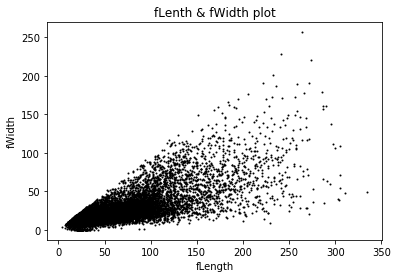

In [20]:
# correlation
a=np.dot(centered_data[0],centered_data[1])
b=np.sqrt(np.dot(centered_data[0],centered_data[0]))*np.sqrt(np.dot(centered_data[1],centered_data[1]))
theta=math.acos(a/b)
print('correlation(fLength,fWidth):',a/b)
print('theta(fLength,fWidth):',theta)
a=np.array(df1.transpose())
plt.title('fLenth & fWidth plot')
plt.xlabel('fLength')
plt.ylabel('fWidth')
plt.scatter(a[0],a[1],alpha=1,c='k',s=1)

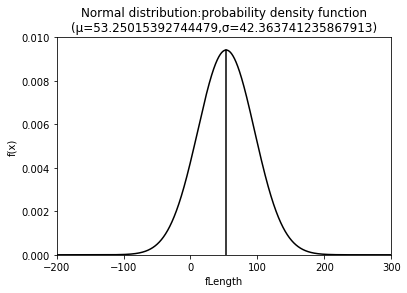

In [21]:
# Normal distribution:probability density function
mu=np.mean(a[0])
sigma=np.std(a[0])
mu,sigma
def normfun(x):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

plt.xlim(-200,300)
plt.ylim(0,0.01)
x = np.linspace(-200, 300,10000)
# y = np.exp(-(x - mu) ** 2 /(2* sigma **2))/(math.sqrt(2*math.pi)*sigma)
y=normfun(x,)
y_mu=1/(math.sqrt(2*math.pi)*sigma)
y_sigma1=normfun(mu-sigma)

plt.title('Normal distribution:probability density function\n(μ=53.25015392744479,σ=42.363741235867913)')
plt.xlabel('fLength')
plt.ylabel('f(x)')
plt.plot(x,y,'k')
plt.plot([mu,mu],[0,y_mu],'k')

In [27]:
# variance
var=[]
for i in range(10):
    v=np.dot(centered_data[i],centered_data[i])
    var.append(v)
print(var)
print('max:',max(var))
print('min:',min(var))


[34134938.58992191, 6401372.828332526, 4247.883812288351, 635.6272814308828, 232.2721369018354, 66668399.53676005, 49468647.939886525, 8250103.910958735, 12959527.65229839, 106218071.63104317]
max: 106218071.63104317
min: 232.2721369018354


In [32]:
print('cov.max:',cov1.max())
print(np.where(cov1==np.max(cov1)))
print('cov.min:',cov1.min())
print(np.where(cov1==np.min(cov1)))

cov.max: 5584.839982703778
(array([9], dtype=int64), array([9], dtype=int64))
cov.min: -924.4341029748748
(array([0, 5], dtype=int64), array([5, 0], dtype=int64))


In [34]:
np.unique(cov1,return_index=True)

(array([-924.43410297, -914.69072157, -430.25324691, -289.97234587,
        -258.72715464, -247.98508   , -247.98508   , -164.89373393,
         -86.06634976,  -18.26636059,   -9.70681761,   -9.70681761,
          -4.88699477,   -4.48566053,   -4.47307815,   -2.8003803 ,
          -2.51579453,   -2.30292484,   -2.30292484,   -2.04513685,
          -1.17822641,   -1.13652751,   -0.66938915,   -0.07351108,
          -0.0430025 ,   -0.04224323,   -0.04224323,   -0.02523905,
           0.01221264,    0.01972628,    0.03342065,    0.15212134,
           0.15212134,    0.22334948,    0.65533268,    0.66290718,
           0.66290718,    1.12273751,    1.12273751,    1.21519489,
           2.29353454,    2.29353454,    2.53303424,    2.53303424,
           3.14793086,    3.14793086,    6.22110176,   11.81400775,
          14.06422933,   15.18608687,   15.43546731,   17.78519789,
          31.63669384,   31.63669384,  141.11515521,  141.11515521,
         336.5777816 ,  433.7822131 ,  461.78620